#Project Name    - FedEx Logistics Performance Analysis and EDA
#Project By - Debyendu Saha.
#Contribution    - Individual.


# **Project Summary :**

This project centers on analyzing a logistics dataset to uncover actionable insights for optimizing shipping operations, enhancing delivery performance, and managing freight costs more effectively.

Using statistical analysis and data visualizations, the study identified key trends—most notably, a strong link between the mode of shipment and on-time delivery. Air freight, while costlier, achieved the highest punctuality, making it ideal for time-critical deliveries. Conversely, sea freight offered lower costs but was associated with more frequent delays.

A positive correlation was also observed between freight cost and delivery reliability, suggesting that higher shipping investments often lead to improved timeliness. Moreover, vendor performance emerged as a critical factor, reinforcing the importance of aligning with dependable logistics partners. Lastly, the analysis highlighted a direct relationship between shipment weight and insurance expenses, with heavier shipments typically incurring greater costs.
**bold text**


# Problem Statement :

The objective of this analysis is to examine FedEx’s shipment data to identify the key factors impacting on-time delivery performance, evaluate the relationship between different shipment modes and freight costs, and uncover patterns that can drive logistics optimization. The ultimate goal is to deliver actionable insights that enhance operational efficiency, reduce shipping expenses, and improve overall customer satisfaction.



# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency


### Dataset Loading

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
Dataset = pd.read_csv('/content/drive/MyDrive/STUDY/MY_PROJECT/FedEx Logistics Performance Analysis/Working on /SCMS_Delivery_History_Dataset.csv')

### First view the data set

In [ ]:
Dataset.head(50)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643,Freight Included in Commodity Cost,NaN


###Dataset Rows & Columns count

In [ ]:
Dataset.shape
print(f"Rows:{Dataset.shape[0]},\nColumns:{Dataset.shape[1]}")


Rows:10324,
Columns:33


### Dataset Information

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [ ]:
Dataset.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values=Dataset.isna().sum()
missing_values

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


###  know about this dataset

**Number of Rows:** The dataset contains 10324 entries or rows.

**Number of Columns:** There are 33 columns in the dataset, each representing different attributes or features.

**Data Types:** The dataset contains a mix of data types, including integers (int64), floats (float64), and objects (object). This suggests that the dataset includes both numerical and categorical variables.

**Duplicate Rows:** The dataset contains no duplicate entries.

**Missing Values:** While the majority of columns contain complete data, several columns exhibit notable numbers of missing values. Specifically, the Shipment Mode column has 360 missing values, Line Item Insurance (USD) column has 287 missing values and Dosage column have high amount of missing values i.e 1736.

### Understanding Your Variables

In [ ]:
# Dataset Columns
print(Dataset.columns)

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')


In [ ]:
# Dataset Describe
Dataset.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [ ]:
print(Dataset.nunique())

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

## ***Data Wrangling***

### ***Selected Columns for Analysis***

### ***Copy of Datasset for Analysis***

In [ ]:
df = Dataset.copy()
df.head(5)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


###***Converted Columns to Suitable Data Types :***

In [ ]:
# Converted("Scheduled Delivery Date","Delivered to Client Date","PO Sent to Vendor Date") date columns to datetime datatype:
df["Scheduled Delivery Date"] = pd.to_datetime(df["Scheduled Delivery Date"], format='%d-%b-%y', errors='coerce')
df["Delivered to Client Date"] = pd.to_datetime(df["Delivered to Client Date"], format='%d-%b-%y', errors='coerce')
df["PO Sent to Vendor Date"] = pd.to_datetime(df["PO Sent to Vendor Date"], format='%m/%d/%y', errors='coerce')


In [ ]:
# Converted "Weight" columns to numeric datatype After Cleaning Textual Noise:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].replace(
    r'(See (ASN)-\d+ \(ID#:\d+\)|Weight Captured Separately)',
    np.nan,
    regex=True
)

df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')




In [ ]:
# Use regex to replace non-numeric values with NaN in 'Freight Cost (USD) columns:
df['Freight Cost (USD)']=df['Freight Cost (USD)'].replace(r'[^0-9.]', np.nan,regex=True)

# Converted "Freight Cost (USD)" columns to numeric datatye:
df["Freight Cost (USD)"] = pd.to_numeric(df["Freight Cost (USD)"],errors='coerce')


In [ ]:
# Converted "Line Item Insurance (USD)" columns to numeric datatype:
df["Line Item Insurance (USD)"] = pd.to_numeric(df["Line Item Insurance (USD)"],errors='coerce')

In [ ]:
# Checked resulting data types:
print(df.dtypes)

ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date            object
PO Sent to Vendor Date          datetime64[ns]
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date                  object
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage       

###***Imputed and Removed Null Values for Clean Data***

In [ ]:
df['Brand'].unique()

array(['Reveal', 'Generic', 'Determine', 'Stocrin/Sustiva', 'Aluvia',
       'Uni-Gold', 'InstantCHEK', 'Videx', 'First Response', 'Stat-Pak',
       'OraQuick', 'Bioline', 'Retrovir', 'Viread', 'Zerit', 'Capillus',
       'Genie', 'Invirase', 'Videx EC', 'Ziagen', 'Coartem', 'Viramune',
       'Paramax', 'Atripla', 'Kaletra', 'Epivir', 'Norvir', 'Truvada',
       'Clearview', 'Colloidal Gold', 'INSTi', 'Trizivir', 'Visitect',
       'Viracept', 'DoubleCheck', 'Bundi', 'ImmunoComb', 'Crixivan',
       'LAV', 'Pepti-LAV', 'Intelence', 'Prezista', 'Isentress',
       'Reyataz', 'Combivir', 'Multispot', 'CareStart', 'Hexagon'],
      dtype=object)

In [ ]:
df['Molecule/Test Type'].unique()

array(['HIV, Reveal G3 Rapid HIV-1 Antibody Test', 'Nevirapine',
       'HIV 1/2, Determine Complete HIV Kit', 'Lamivudine', 'Stavudine',
       'Zidovudine', 'Efavirenz', 'Lopinavir/Ritonavir',
       'HIV 1/2, Uni-Gold HIV Kit', 'HIV 1/2, InstantChek HIV 1+2 Kit',
       'Lamivudine/Zidovudine', 'Didanosine',
       'HIV 1/2/O, First Response HIV 1-2.0, v.3.0 Cards Kit',
       'HIV 1/2, Stat-Pak HIV, Kit',
       'HIV 1/2, Determine HIV Kit, without Lancets',
       'HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit',
       'HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary pipets, Alcohol swabs included',
       'Tenofovir Disoproxil Fumarate',
       'HIV, Lancet, Safety, for HIV Test kits, 100 Pcs',
       'HIV 1/2, Capillus HIV Kit', 'HIV, Genie II HIV-1/HIV-2 Kit',
       'Saquinavir', 'Didanosine EC', 'Abacavir',
       'Artemether/Lumefantrine', 'Malaria Paramax-3 Kit',
       'Artesunate+Amodiaquine',
       'Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate',
       'HIV 1, 

In [ ]:
# Show the number of null (missing) values in each column:
print(df.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date          5732
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [ ]:
# Filled nulls in "Shipment Mode" with Most Frequent Value:
mode_value = df['Shipment Mode'].mode()[0]
df['Shipment Mode'] = df['Shipment Mode'].fillna(mode_value)
print(f"Imputed missing values with mode: {mode_value}")
print(f"After Impute null values:{df['Shipment Mode'].isna().sum()}")

Imputed missing values with mode: Air
After Impute null values:0


In [ ]:
# Drop "Dose Columns"
df.drop(columns='Dosage', inplace=True)

In [ ]:
# Filled nulls in "Freight Cost (USD)" with Median value:
median=df['Freight Cost (USD)'].median()
df['Freight Cost (USD)']=df['Freight Cost (USD)'].fillna(median)
print(f"Imputed missing values with mode: {median}")
print(f"After Impute null values:{df['Freight Cost (USD)'].isna().sum()}")

Imputed missing values with mode: 5869.655000000001
After Impute null values:0


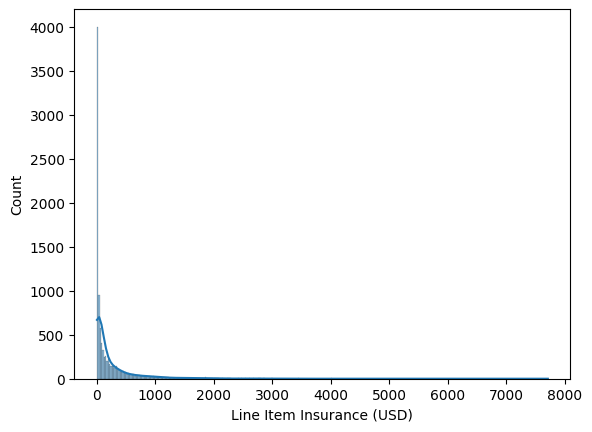

In [ ]:
# Line Item Insurance (USD) – Value Distribution Overview:
sns.histplot(df['Line Item Insurance (USD)'], kde=True)
plt.show()

In [ ]:
# Calculate the median of the entire column:
median_value = df['Line Item Insurance (USD)'].median()
# as the data is not symmetrical and most values are equal to 0.00
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(median_value)
print(f"Imputed missing values with median: {median_value}")
print(f"After Impute null values:{df['Line Item Insurance (USD)'].isna().sum()}")

Imputed missing values with median: 47.04
After Impute null values:0


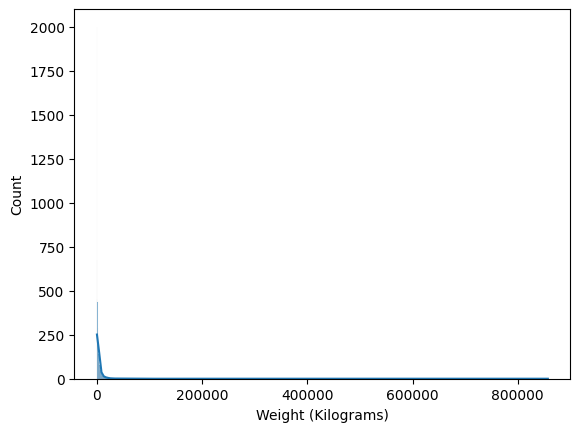

In [ ]:
# Line Weight (Kilograms) – Value Distribution Overview:
sns.histplot(df['Weight (Kilograms)'], kde=True)
plt.show()

In [ ]:
median=df['Weight (Kilograms)'].median()
df['Weight (Kilograms)']=df['Weight (Kilograms)'].fillna(median)
print(f"Imputed missing values with median: {median}")
print(f"After Impute null values:{df['Weight (Kilograms)'].isna().sum()}")

Imputed missing values with median: 1047.0
After Impute null values:0


In [ ]:
# Replaced null values with 0 from **PO Sent to Vendor Date**.
df['PO Sent to Vendor Date'] = df['PO Sent to Vendor Date'].fillna(0)
print(f"After Impute null values:{df['PO Sent to Vendor Date'].isna().sum()}")

After Impute null values:0


In [ ]:
#Final Check: Null Values Across All Columns:
print(df.isnull().sum())

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Designation          0
Weight (Kilogr

###***Created Delivery Delay Column and Labeled Each Shipment as On Time or Delayed***

In [ ]:
df['Delivery_Delay'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days
df['Delay_Status'] = df['Delivery_Delay'].apply(lambda x: 'On Time' if x <= 0 else 'Delayed')


###***Using LabelEncoder converted categorical values ('on time', 'delayed') into numeric format for analysis.***

In [ ]:
le = LabelEncoder()
df['delay_status_encoded'] = le.fit_transform(df['Delay_Status'])
print(le.classes_)  # To know the mapping

['Delayed' 'On Time']


In [ ]:
df[['Delivery_Delay','Delay_Status','delay_status_encoded']]  # "On time" = 1 , "Delayed" = 0

,Delivery_Delay,Delay_Status,delay_status_encoded
0,0,On Time,1
1,0,On Time,1
2,0,On Time,1
3,0,On Time,1
4,0,On Time,1
...,...,...,...
10319,-16,On Time,1
10320,6,Delayed,0
10321,-6,On Time,1
10322,-36,On Time,1


# ***Data Analysis & Insight Generation :***

## 1.Analyse which office is handling most of the deliveries :

<ipython-input-37-1501858812>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=managed_by_df.index, y=managed_by_df['Count'], palette='viridis')


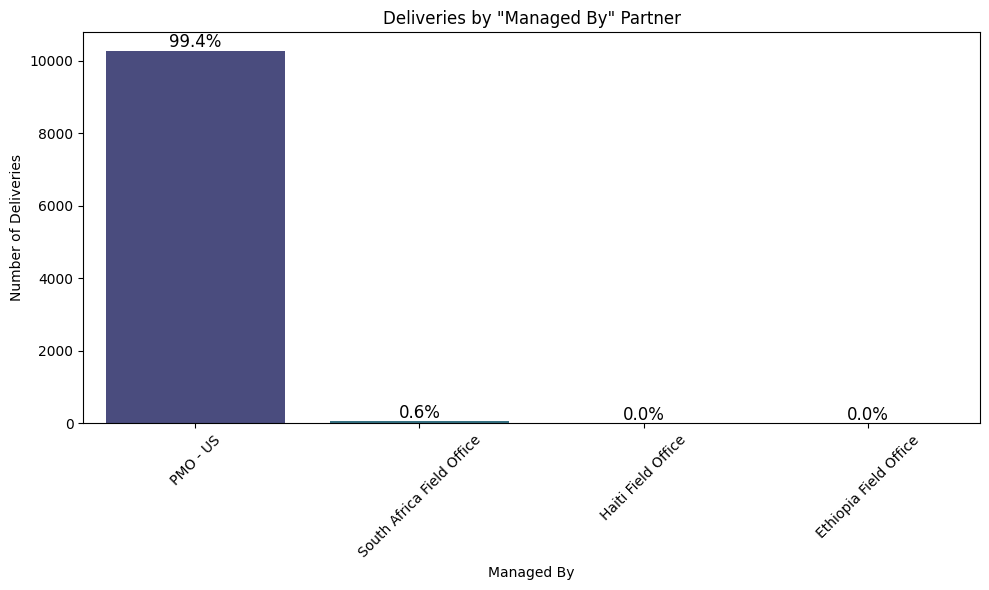

In [ ]:

# Count the number of deliveries by "Managed By"
managed_by_counts = df['Managed By'].value_counts()
managed_by_percent = (managed_by_counts / managed_by_counts.sum()) * 100

# Create a DataFrame for better plotting
managed_by_df = pd.DataFrame({
    'Count': managed_by_counts,
    'Percentage': managed_by_percent
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=managed_by_df.index, y=managed_by_df['Count'], palette='viridis')

# Add percentage label
for i, (count, perc) in enumerate(zip(managed_by_df['Count'], managed_by_df['Percentage'])):
    plt.text(i, count + 100, f'{perc:.1f}%', ha='center', fontsize=12)

plt.title('Deliveries by "Managed By" Partner')
plt.xlabel('Managed By')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows who is managing the deliveries. We can see that almost all deliveries (99.4%) are handled by *PMO* - US. The other offices (South Africa, Haiti, and Ethiopia) are doing very few deliveries. This means that most of the work is being done by one office, which might cause delays or too much pressure on that team. It may be helpful to let other offices handle more deliveries to make the process faster and more balanced.

##2.Analyse of Distribution of Shipment Modes :

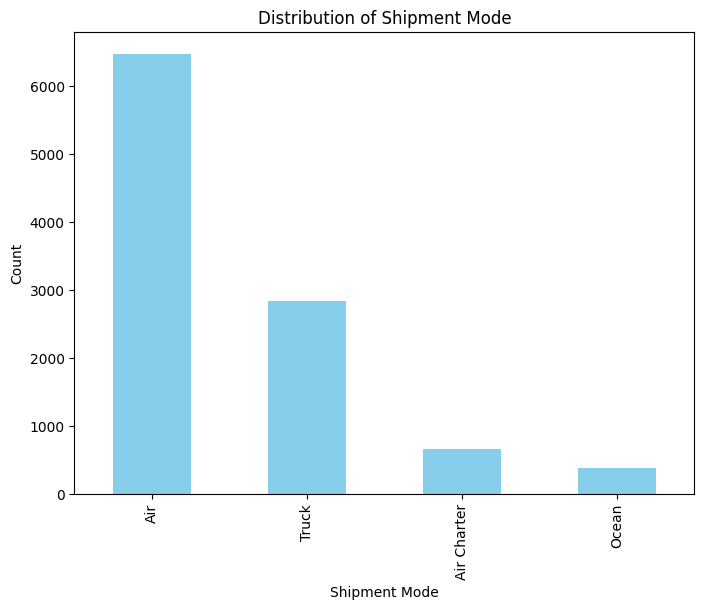

In [ ]:
shipment_mode_counts = df['Shipment Mode'].value_counts()
shipment_mode_counts.plot(kind='bar', figsize=(8, 6), color='skyBlue')
plt.title('Distribution of Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.show()


The chart shows that air shipping is used the most for deliveries, followed by truck, while air charter and ocean are used much less. This suggests the company relies heavily on faster delivery methods, which may help with speed but could also lead to higher costs. There may be an opportunity to reduce expenses by using more cost-effective shipment modes where possible.

## 3.Analyse delivery partners use shipment modes :

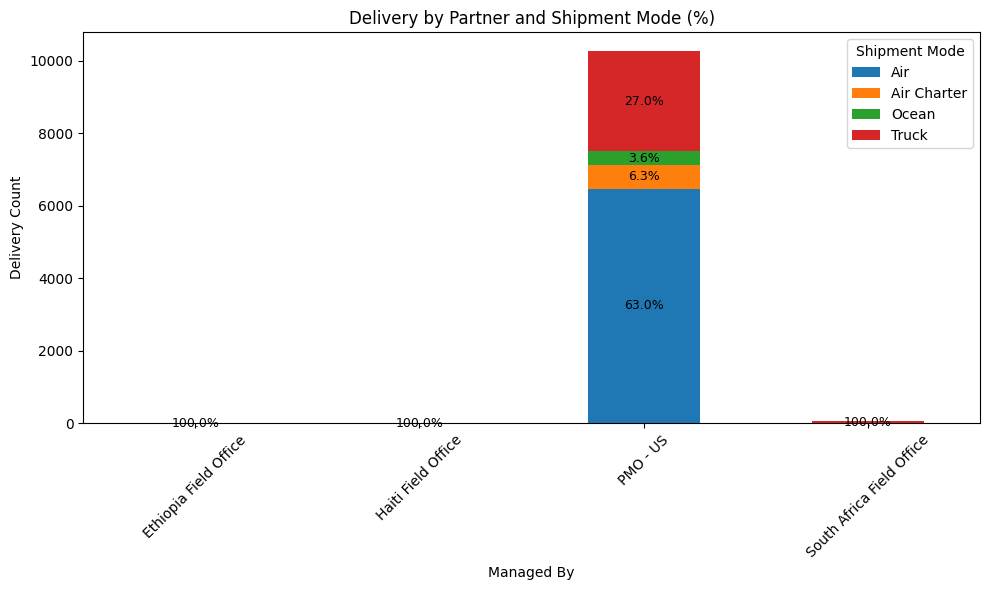

In [ ]:

# Group by 'Managed By' and 'Shipment Mode'
grouped = df.groupby(['Managed By', 'Shipment Mode']).size().unstack(fill_value=0)

# Calculate percentage
percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add percentage labels
for i, partner in enumerate(grouped.index):
    y = 0
    for mode in grouped.columns:
        count = grouped.loc[partner, mode]
        p = percent.loc[partner, mode]
        if count > 0:
            ax.text(i, y + count / 2, f'{p:.1f}%', ha='center', va='center', fontsize=9)
        y += count

# Labels and title
plt.title('Delivery by Partner and Shipment Mode (%)')
plt.xlabel('Managed By')
plt.ylabel('Delivery Count')
plt.xticks(rotation=45)
plt.legend(title='Shipment Mode')
plt.tight_layout()
plt.show()


This chart shows how different delivery partners use shipment modes. The PMO - US manages most of the deliveries and mainly uses Air (63%), followed by Truck (27%), with smaller use of Air Charter (6.3%) and Ocean (3.6%). Other partners like Ethiopia, Haiti, and South Africa Field Offices show 100% use of a single shipment mode, mostly truck. This suggests that the PMO - US handles a larger and more varied volume, while other partners rely on just one method, possibly due to local infrastructure or logistics policies.

##4.Analyse Delivery status On-time & Delay :

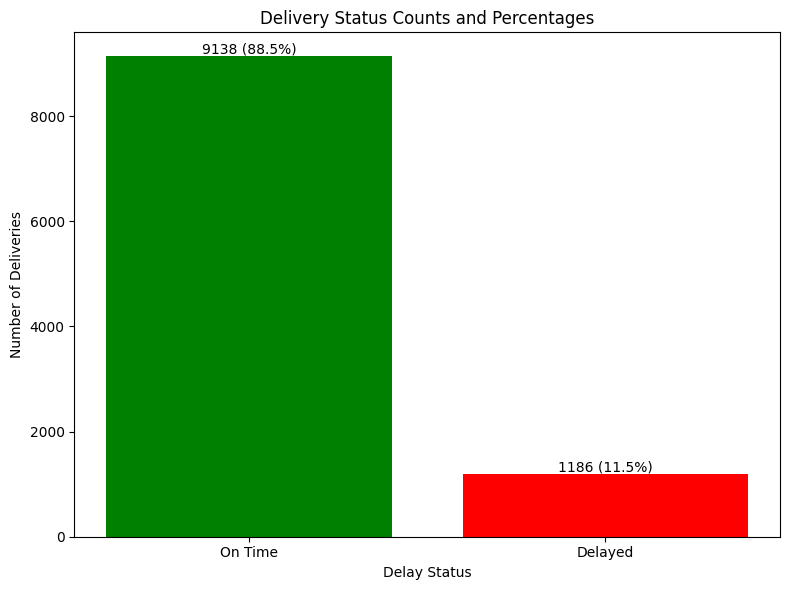

In [ ]:
status_counts = df['Delay_Status'].value_counts()
total = status_counts.sum()

# Calculate percentages
status_percentages = (status_counts / total) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(status_counts.index, status_counts.values, color=['green','red'])

# Add counts and percentages as text labels on top of bars
for i, bar in enumerate(bars):
    count = status_counts.values[i]
    percentage = status_percentages.values[i]
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{count} ({percentage:.1f}%)",
        ha='center',
        va='bottom'
    )

plt.title('Delivery Status Counts and Percentages')
plt.xlabel('Delay Status')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This chart shows the overall delivery performance based on delay status. Out of all deliveries, 88.5% were completed on time, while 11.5% were delayed. This is a positive result, as most deliveries are punctual. However, the 11.5% delay rate still shows room for improvement. Investigating the reasons behind these delays can help improve efficiency and reduce future issues.

##5. Analyse of on time or delayed based on the shipment mode :

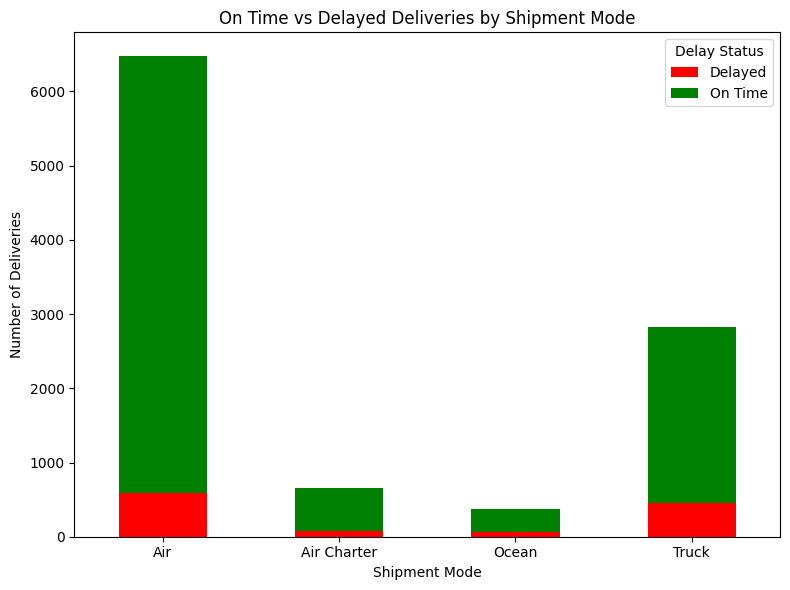


Percentages by Shipment Mode:
Delay_Status   Delayed  On Time
Shipment Mode                  
Air                9.1     90.9
Air Charter       11.5     88.5
Ocean             17.5     82.5
Truck             16.1     83.9


In [ ]:
contingency_table = pd.crosstab(df['Shipment Mode'], df['Delay_Status'])

# Calculate percentages
percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plot stacked bar chart for counts
ax = contingency_table.plot(
    kind='bar',
    stacked=True,
    color=['red', 'green'],
    figsize=(8, 6)
)


plt.title('On Time vs Delayed Deliveries by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delay Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print out percentages
print("\nPercentages by Shipment Mode:")
print(percentages.round(1))

This chart shows how often deliveries were on time or delayed based on the shipment mode. Air shipments had the best performance, with 90.9% delivered on time, followed by Air Charter (88.5%). However, Ocean (82.5%) and Truck (83.9%) had more delays. This suggests that Air is the most reliable shipment method, while Ocean and Truck may need improvements to reduce delays. This analysis helps in making better decisions when choosing a shipment mode for faster and more reliable delivery.

##6.Analyse of Vendor Delivery performance :

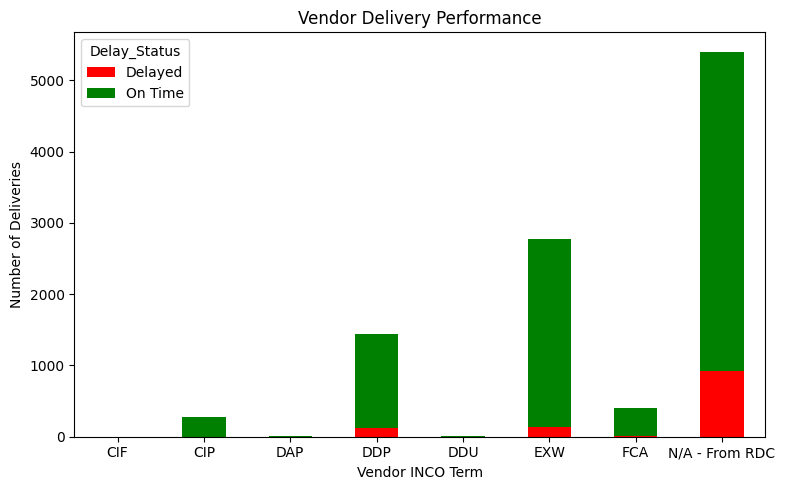

In [ ]:
# Create a simple count table
counts = pd.crosstab(df['Vendor INCO Term'], df['Delay_Status'])

# Plot a stacked bar chart
counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.title('Vendor Delivery Performance')
plt.xlabel('Vendor INCO Term')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This chart shows how different Vendor INCO Terms affect delivery performance. Most deliveries under EXW, DDP, and N/A - From RDC terms were completed on time. However, the N/A - From RDC category also had the highest number of delayed deliveries. Terms like CIP, FCA, and DDP showed good on-time performance with fewer delays. This suggests that while some INCO terms work well for timely delivery, others like N/A - From RDC may need attention to reduce delays and improve overall vendor performance.

##7.Analyse of percentage of delayed deliveries for different Vendor INCO Terms :

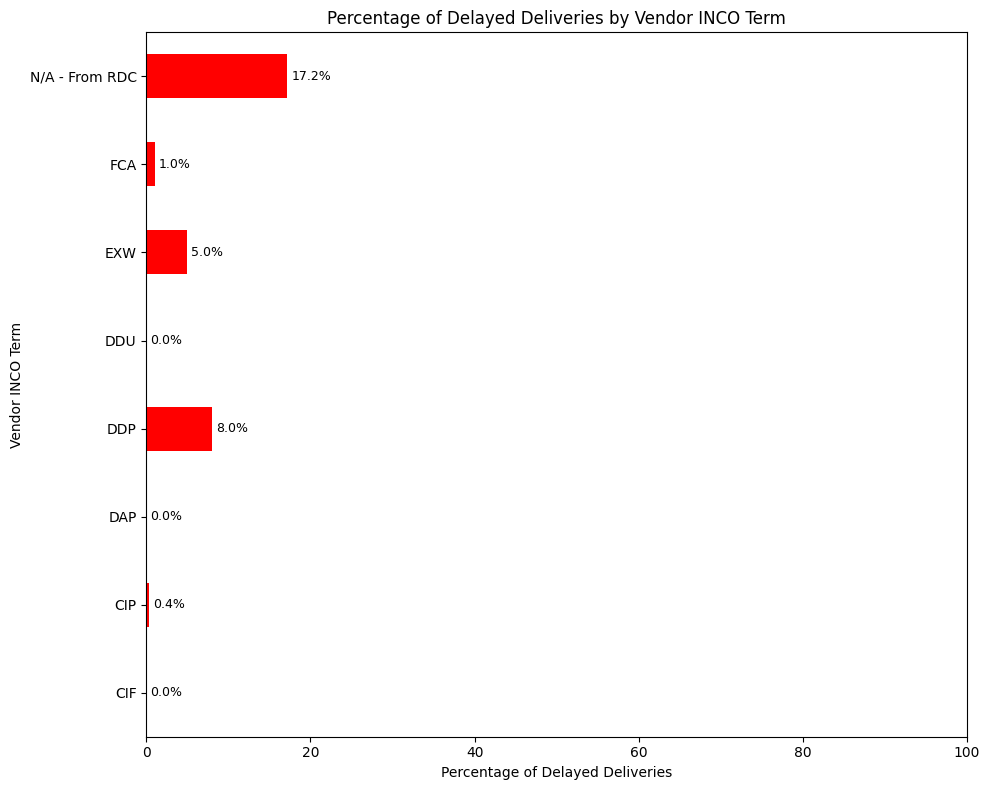

In [ ]:


# Create the count table
counts = pd.crosstab(df['Vendor INCO Term'], df['Delay_Status'])

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot only the delayed percentage as a horizontal bar chart
ax = percentages['Delayed'].plot(kind='barh', color='red', figsize=(10, 8))
plt.title('Percentage of Delayed Deliveries by Vendor INCO Term')
plt.xlabel('Percentage of Delayed Deliveries')
plt.ylabel('Vendor INCO Term')

# Add percentage labels on bars
for i, (index, percent) in enumerate(percentages['Delayed'].items()):
    ax.text(percent + 0.5, i, f"{percent:.1f}%", va='center', color='black', fontsize=9)

plt.xlim(0, 100)  # Make sure the x-axis goes from 0 to 100%
plt.tight_layout()
plt.show()




This chart shows the percentage of delayed deliveries for different Vendor INCO Terms. The INCO Term "N/A - From RDC" has the highest percentage of delays at 17.2%, meaning it may be a major reason for late deliveries. Other terms like "DDP" (8.0%) and "EXW" (5.0%) also show some delays, but not as much. Most of the other INCO Terms like "CIF", "DDU", and "DAP" have 0% delays, meaning they are performing better in terms of timely delivery. This analysis helps us identify which delivery terms are more likely to cause delays and can guide where improvements are needed in the delivery process.

##8.Analyse of On-time vs Delayed deliveries by each Country :


Number of deliveries by country:
Delay_Status        Delayed  On Time
Country                             
Afghanistan               0        3
Angola                    0        7
Belize                    0        1
Benin                     3       10
Botswana                  2       68
Burkina Faso              0        2
Burundi                  38       60
Cameroon                  7       68
Congo, DRC               83      250
Côte d'Ivoire           134      949
Dominican Republic        4       48
Ethiopia                 12      204
Ghana                     8       50
Guatemala                 2       13
Guinea                    0        1
Guyana                   24      213
Haiti                    62      593
Kazakhstan                0        2
Kenya                    14       97
Kyrgyzstan                0        2
Lebanon                   0        8
Lesotho                   0        4
Liberia                   0        6
Libya                     1        7
Mala

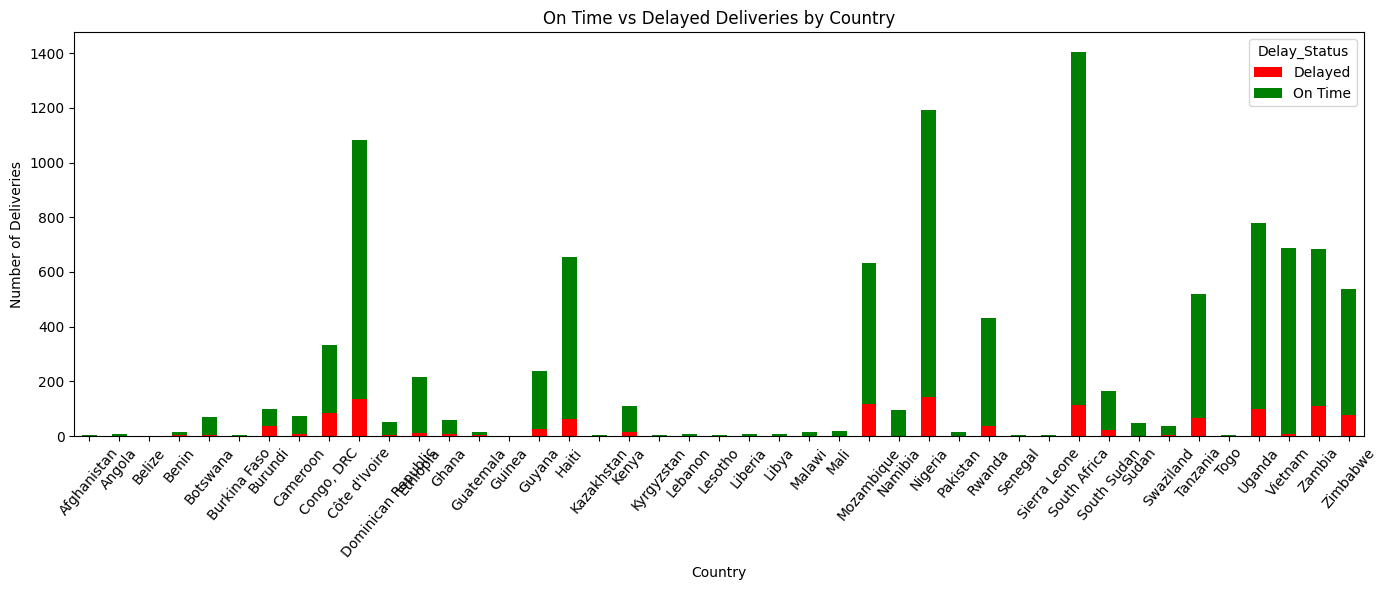

In [ ]:

# Create a count table for each country
country_counts = pd.crosstab(df['Country'], df['Delay_Status'])
print("\nNumber of deliveries by country:")
print(country_counts)

# Plot stacked bar chart
country_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(14, 6))
plt.title('On Time vs Delayed Deliveries by Country')
plt.xlabel('Country')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

This chart shows how many deliveries were made on time versus how many were delayed for each country. We can see that countries like South Africa, Nigeria, and Côte d'Ivoire had the highest number of deliveries overall, but they also had a high number of delays. For example, Nigeria had 142 delayed deliveries out of 1,194 total, and South Africa had 115 delays out of 1,406. On the other hand, many countries like Afghanistan, Angola, and Lesotho had only on-time deliveries with no delays. This analysis helps identify where delivery performance is strong and where delays are more common, so we can focus on improving operations in the countries with more frequent delays.

##9. analyse of Shipment Modes and Vendor Terms Linked to Delivery Delays :

Countries with major delay delivery:
 Country
Nigeria               142
Côte d'Ivoire         134
Mozambique            116
South Africa          115
Zambia                108
Uganda                 98
Congo, DRC             83
Zimbabwe               77
Tanzania               66
Haiti                  62
Burundi                38
Rwanda                 37
Guyana                 24
South Sudan            21
Kenya                  14
Ethiopia               12
Ghana                   8
Cameroon                7
Vietnam                 6
Dominican Republic      4
Benin                   3
Swaziland               3
Guatemala               2
Botswana                2
Senegal                 1
Namibia                 1
Libya                   1
Togo                    1
dtype: int64


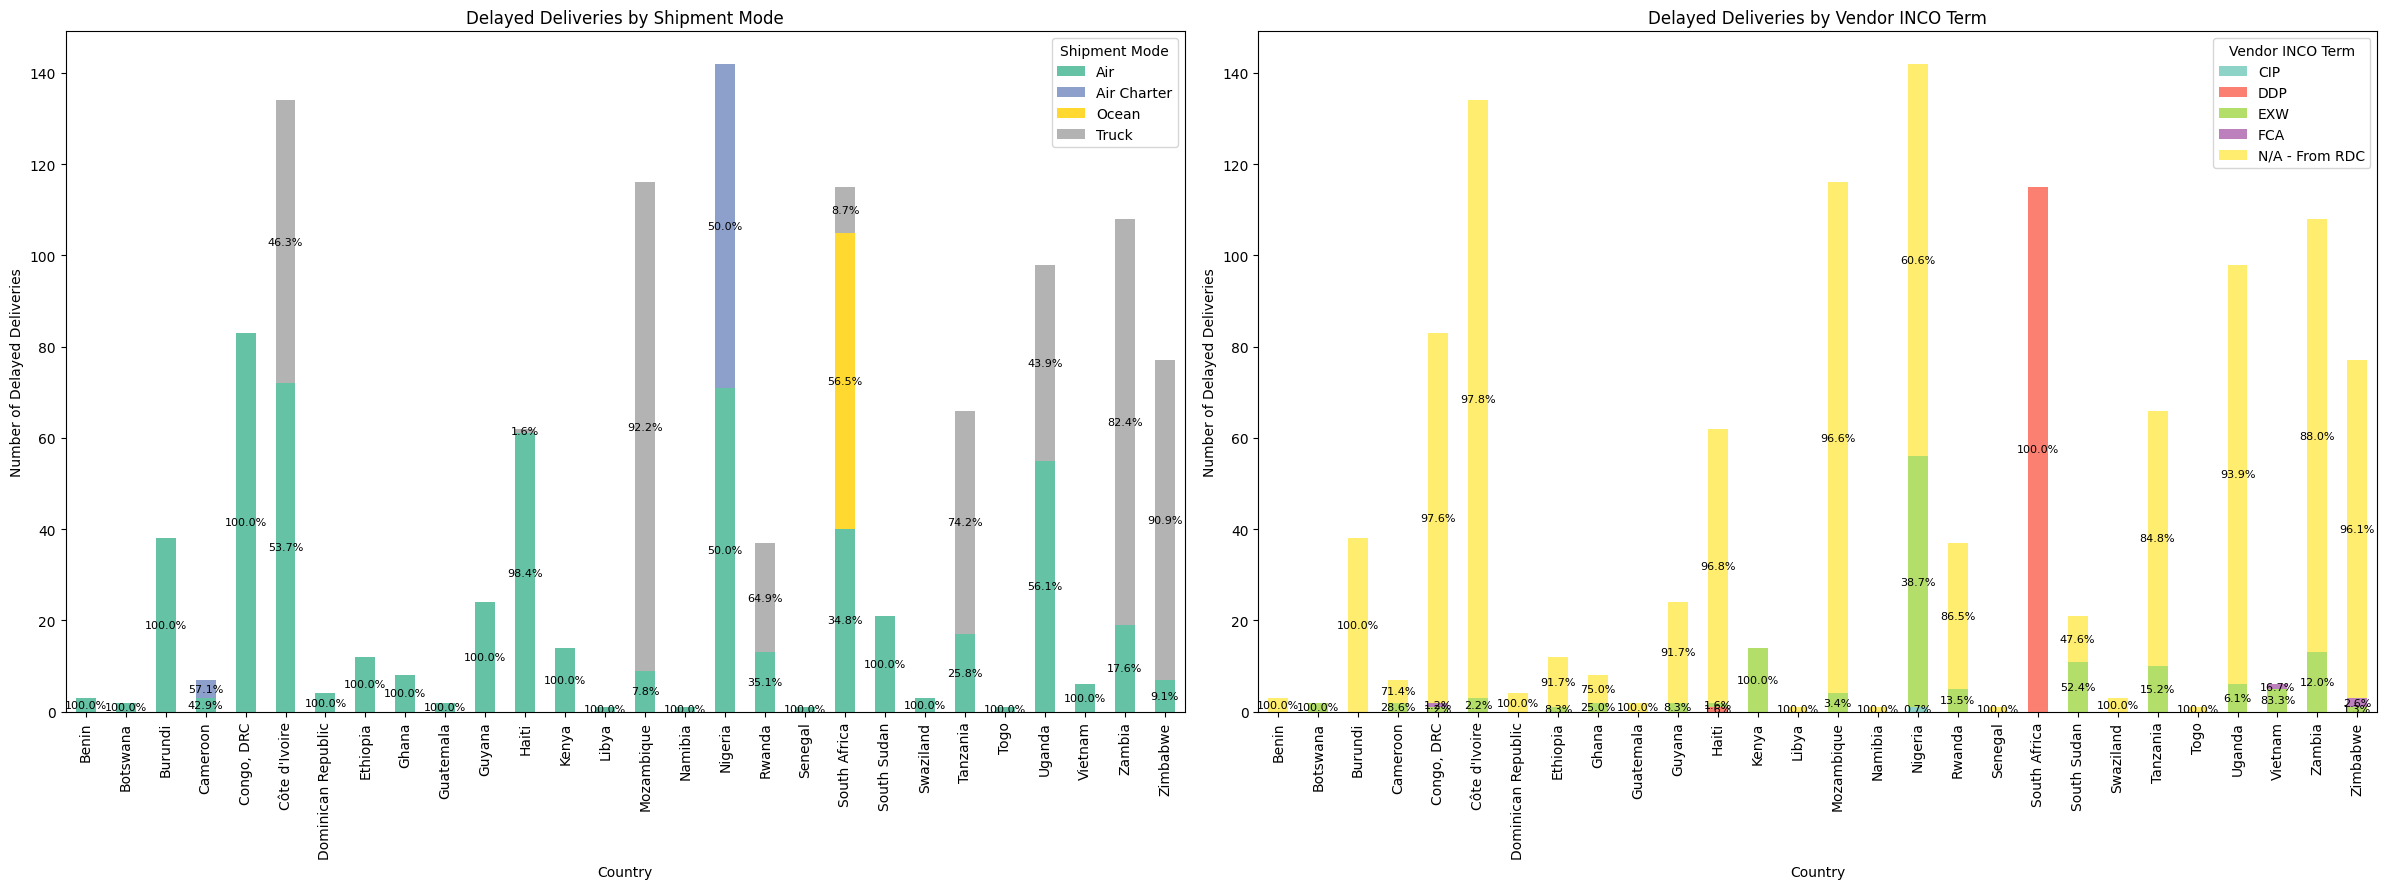

In [ ]:
# Calculate delayed delivery counts by country
delay_counts = df[df['Delay_Status'] == 'Delayed'].groupby('Country').size().sort_values(ascending=False)
print("Countries with major delay delivery:\n", delay_counts)

# Focus on these major delay countries
major_countries = delay_counts.index.tolist()

# Filter delayed deliveries for major delay countries
delayed_deliveries = df[(df['Delay_Status'] == 'Delayed') & (df['Country'].isin(major_countries))]

# --- Group data by Shipment Mode ---
shipment_delay = delayed_deliveries.groupby(['Country', 'Shipment Mode']).size().unstack(fill_value=0)

# --- Group data by Vendor INCO Term ---
vendor_delay = delayed_deliveries.groupby(['Country', 'Vendor INCO Term']).size().unstack(fill_value=0)

# --- Plot with percentages labeled on bars ---
fig, axes = plt.subplots(1, 2, figsize=(24, 9))

# --- Plot 1: Shipment Mode Counts ---
ax1 = shipment_delay.plot(kind='bar', stacked=True, ax=axes[0], cmap='Set2')
ax1.set_title('Delayed Deliveries by Shipment Mode')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Delayed Deliveries')
ax1.legend(title='Shipment Mode')

# Add percentage labels for shipment mode
for i, (idx, row) in enumerate(shipment_delay.iterrows()):
    total = row.sum()
    cumulative = 0
    for shipment_mode in shipment_delay.columns:
        count = row[shipment_mode]
        if count > 0:
            percentage = (count / total) * 100
            ax1.text(i, cumulative + count / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8, color='black')
            cumulative += count

# --- Plot 2: Vendor INCO Term Counts ---
ax2 = vendor_delay.plot(kind='bar', stacked=True, ax=axes[1], cmap='Set3')
ax2.set_title('Delayed Deliveries by Vendor INCO Term')
ax2.set_xlabel('Country')
ax2.set_ylabel('Number of Delayed Deliveries')
ax2.legend(title='Vendor INCO Term')

# Add percentage labels for vendor INCO term
for i, (idx, row) in enumerate(vendor_delay.iterrows()):
    total = row.sum()
    cumulative = 0
    for vendor_term in vendor_delay.columns:
        count = row[vendor_term]
        if count > 0:
            percentage = (count / total) * 100
            ax2.text(i, cumulative + count / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8, color='black')
            cumulative += count


plt.tight_layout()
plt.show()

understand the reasons behind delayed deliveries by looking at Shipment Mode and Vendor INCO Terms across countries where delays are most common.



1. In the left chart, we see that most delays happen when shipments are sent by  Truck or Ocean, especially in countries like Nigeria, South Africa, Zambia, and Mozambique. For example, in Mozambique, over 90% of delays came from truck shipments. This tells us that the choice of shipment method can be a key reason for delays.
2.   In the right chart, we focus on the Vendor INCO Terms (which define who is responsible for different parts of the delivery). Most delayed deliveries are tied to "N/A - From RDC", which likely means the deliveries were coming from regional distribution centers (RDCs). Countries like Côte d'Ivoire, Zambia, and Uganda show a very high percentage of delays under this term, suggesting that there may be issues at the RDC level.

In short, this analysis shows that delays are often linked to using trucks and RDCs. To improve delivery performance, we may need to review our logistics strategies, especially for shipments from RDCs and truck routes in high-delay countries.

##10.Analyse of Total delayed by Vendor :

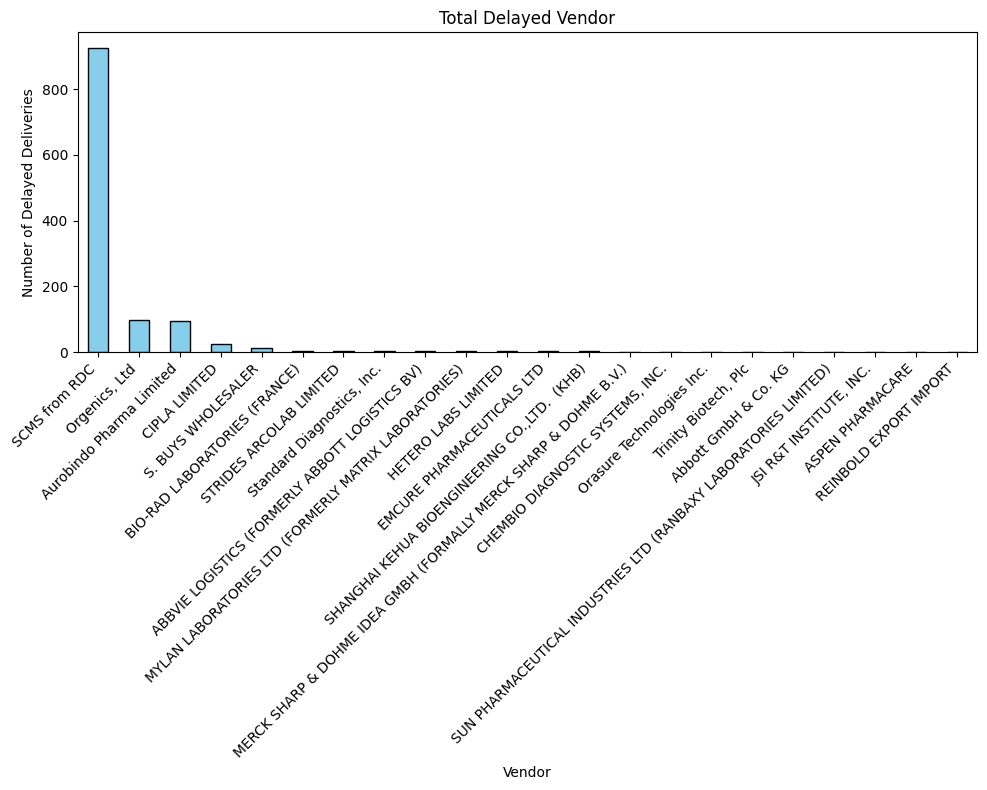

Delayed deliveries by Vendor INCO Term:
 Vendor
SCMS from RDC                                                        927
Orgenics, Ltd                                                         98
Aurobindo Pharma Limited                                              94
CIPLA LIMITED                                                         23
S. BUYS WHOLESALER                                                    11
BIO-RAD LABORATORIES (FRANCE)                                          4
STRIDES ARCOLAB LIMITED                                                4
Standard Diagnostics, Inc.                                             4
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                        4
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                  2
HETERO LABS LIMITED                                                    2
EMCURE PHARMACEUTICALS LTD                                             2
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.  (KHB)                          2
MER

In [ ]:

# Group by Vendor INCO Term to get total delayed deliveries by vendor
vendor_counts = delayed_deliveries['Vendor'].value_counts().sort_values(ascending=False)


# Plot bar chart
plt.figure(figsize=(10, 8))
vendor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Delayed Vendor')
plt.xlabel('Vendor')
plt.ylabel('Number of Delayed Deliveries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Delayed deliveries by Vendor INCO Term:\n", vendor_counts)

From the vendor-wise delayed delivery data, it’s clear that SCMS from RDC is the leading contributor to delays, with 927 delayed deliveries, which is significantly higher than any other vendor. The next highest are Orgenics, Ltd (98 delays) and Aurobindo Pharma Limited (94 delays), followed by CIPLA LIMITED with 23 delays. All other vendors have fewer than 15 delays, and many have only 1 or 2. This highlights a major performance gap—SCMS from RDC alone accounts for the majority of delivery delays, making it a key focus area for improving supply chain efficiency and reducing delivery issues.

##11.Analyse of delayed deliveries by product group (ARV vs HRDT) for each Vendor INCO Term

Delayed Deliveries by Vendor INCO Term and Product Group:
 Product Group     ARV  HRDT
Vendor INCO Term           
CIP                 1     0
DDP               115     1
EXW                26   112
FCA                 4     0
N/A - From RDC    927     0


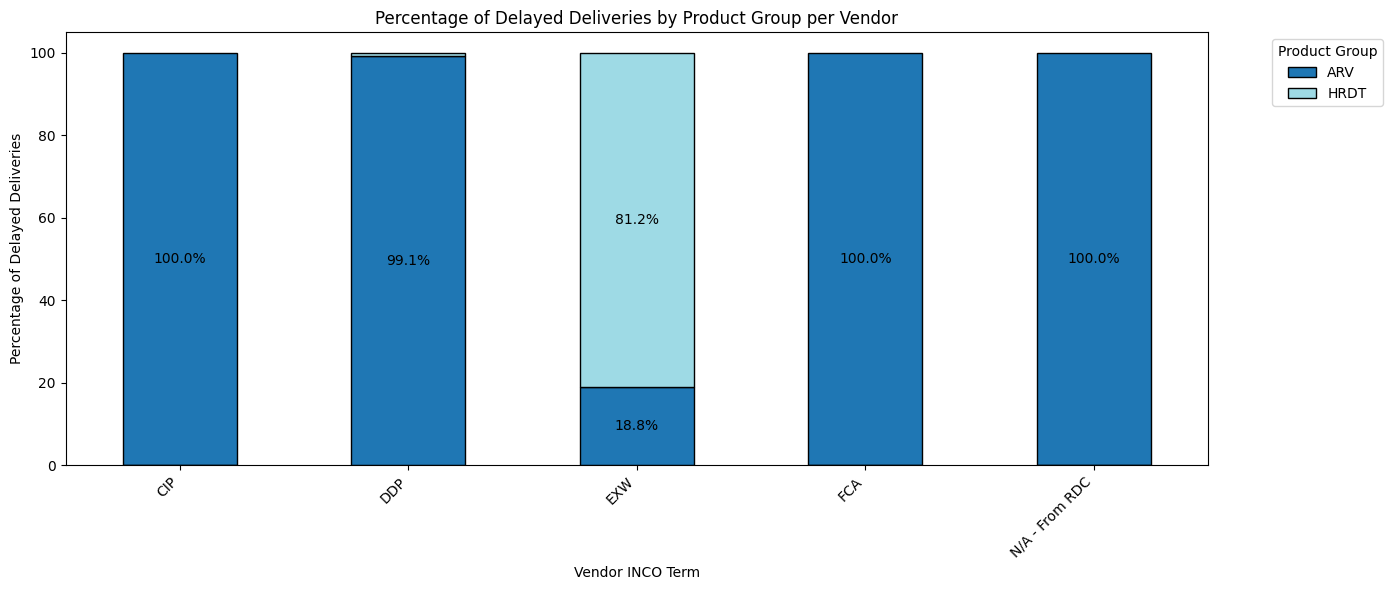

In [ ]:

# Filter only delayed deliveries
delayed_deliveries = df[df['Delay_Status'] == 'Delayed']

# Group by Vendor INCO Term and Product Group to get counts
vendor_product_delay = delayed_deliveries.groupby(['Vendor INCO Term', 'Product Group']).size().unstack(fill_value=0)

print("Delayed Deliveries by Vendor INCO Term and Product Group:\n", vendor_product_delay)

# --- Plot: Stacked bar chart of percentages ---
# Calculate percentages
vendor_product_pct = vendor_product_delay.div(vendor_product_delay.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = vendor_product_pct.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20', edgecolor='black')
plt.title('Percentage of Delayed Deliveries by Product Group per Vendor')
plt.xlabel('Vendor INCO Term')
plt.ylabel('Percentage of Delayed Deliveries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on top of bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 1:  # only label if more than 1% to avoid clutter
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()


This chart shows the percentage of delayed deliveries by product group (ARV vs HRDT) for each Vendor INCO Term. We can see that CIP, DDP, FCA, and N/A - From RDC terms have delays almost entirely caused by ARV products, making up over 99% to 100% of the delays. However, for the EXW term, the situation is different — 81.2% of the delays are from HRDT products, and only 18.8% are from ARV. This tells us that HRDT-related delays are mainly associated with EXW shipments, while ARV delays dominate under other INCO terms. This insight can help focus efforts on improving HRDT shipments under EXW terms and ARV shipments under other terms to reduce overall delays.

##12.Analyse of Delay status of ARV & HRDt By Vendor INCO Term :

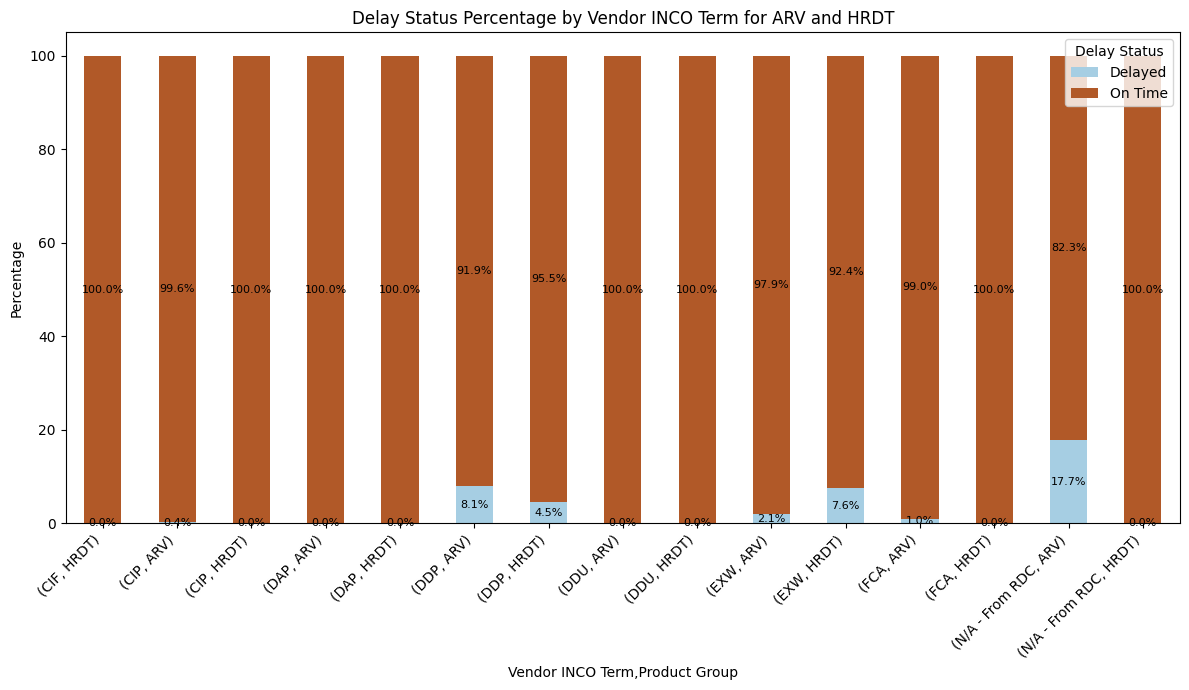

In [ ]:

# 1️⃣ Filter for ARV and HRDT product groups
filtered_df = df[df['Product Group'].isin(['ARV', 'HRDT'])]

# 2️⃣ Group and count
grouped_counts = (
    filtered_df.groupby(['Vendor INCO Term', 'Product Group', 'Delay_Status'])
    .size()
    .reset_index(name='Count')
)

# 3️⃣ Calculate percentages
total_counts = (
    grouped_counts.groupby(['Vendor INCO Term', 'Product Group'])['Count']
    .transform('sum')
)
grouped_counts['Percentage'] = (grouped_counts['Count'] / total_counts) * 100

# 4️⃣ Pivot for plotting
pivot_df = grouped_counts.pivot_table(
    index=['Vendor INCO Term', 'Product Group'],
    columns='Delay_Status',
    values='Percentage',
    fill_value=0
)

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Paired')
plt.ylabel('Percentage')
plt.title('Delay Status Percentage by Vendor INCO Term for ARV and HRDT')

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=8)

# Move legend to top-right
ax.legend(title='Delay Status', loc='upper right', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This chart shows the percentage of delayed vs. on-time deliveries for each combination of Vendor INCO Term and Product Group (ARV or HRDT). Most combinations have very low delay rates, close to 0%, which means deliveries are usually on time. However, there are a few exceptions:

DDP - ARV has a delay rate of 8.1%, and DDP - HRDT is at 4.5%.

EXW - HRDT has a delay rate of 7.6%, while EXW - ARV is at 2.1%.

The highest delay rate is N/A - From RDC - ARV with 17.7%.

These results suggest that while most delivery terms are well managed, there are some specific areas—especially EXW HRDT, DDP, and RDC-based ARV deliveries—where delays are more common. This insight can help identify where improvements are needed to reduce delays in the supply chain.

##13.Analyse od  deliveries for each vendor, separated by Product Group (ARV and HRDT) :

Delayed Deliveries by Vendor and Product Group:
 Product Group                                       ARV  HRDT
Vendor                                                       
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)       4     0
ASPEN PHARMACARE                                      1     0
Abbott GmbH & Co. KG                                  0     1
Aurobindo Pharma Limited                             94     0
BIO-RAD LABORATORIES (FRANCE)                         0     4
CHEMBIO DIAGNOSTIC SYSTEMS, INC.                      0     1
CIPLA LIMITED                                        23     0
EMCURE PHARMACEUTICALS LTD                            2     0
HETERO LABS LIMITED                                   2     0
JSI R&T INSTITUTE, INC.                               1     0
MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK S...    1     0
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORAT...    2     0
Orasure Technologies Inc.                             0     1
Orgenics, Ltd        

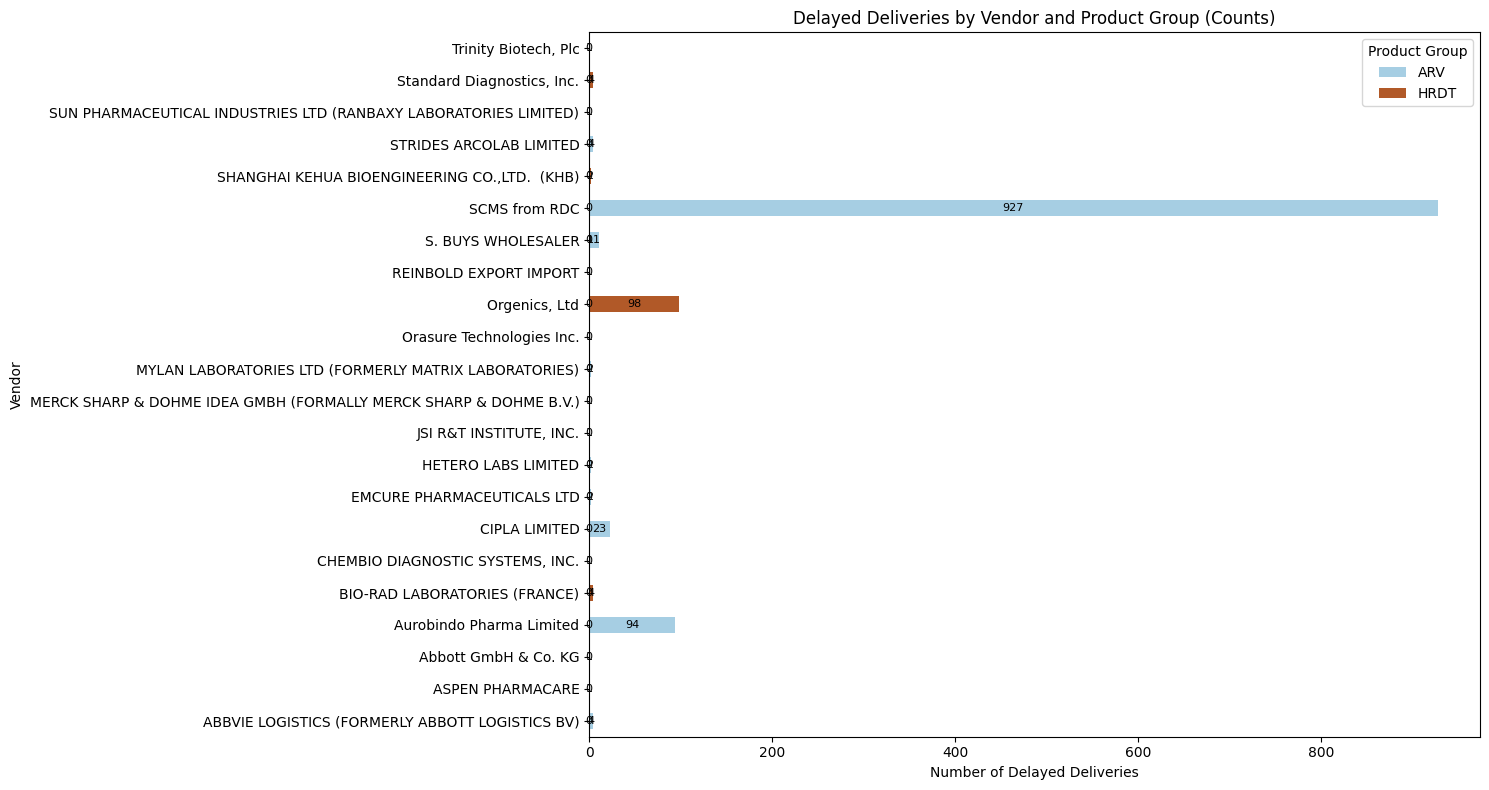

In [ ]:


# Filter only delayed deliveries
delayed_deliveries = df[df['Delay_Status'] == 'Delayed']

# Group by Vendor INCO Term and Product Group to get counts
vendor_product_delay = delayed_deliveries.groupby(['Vendor', 'Product Group']).size().unstack(fill_value=0)

print("Delayed Deliveries by Vendor and Product Group:\n", vendor_product_delay)


# Plot
ax = vendor_product_delay.plot(kind='barh', stacked=True, figsize=(15, 8), colormap='Paired')
plt.title('Delayed Deliveries by Vendor and Product Group (Counts)')
plt.xlabel('Number of Delayed Deliveries')
plt.ylabel('Vendor')
plt.legend(title='Product Group', loc='upper right')

# Add counts as labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)

plt.tight_layout()
plt.show()

This chart shows the number of delayed deliveries for each vendor, separated by Product Group (ARV and HRDT). Most vendors have only a few delays. However, SCMS from RDC stands out with 927 delayed deliveries for ARV products, which is by far the highest among all vendors. Other vendors with notable ARV delays include CIPLA LIMITED (23 delays) and Aurobindo Pharma Limited (94 delays). For HRDT products, Orgenics, Ltd has the highest number of delays with 98. These findings help identify which vendors may need closer attention or process improvements to reduce delays in the supply chain.

##14.Analyse of  Delay is related to Brand or not :

In [ ]:

# Create a contingency table
contingency_table = pd.crosstab(Dataset['Brand'],df['Delay_Status'])

# Apply chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("📊 Chi-Square Test for Independence")
print(f"Chi-square value      : {chi2:.2f}")
print(f"Degrees of Freedom    : {dof}")
print(f"P-value               : {p:.10f}")

if p < 0.05:
    print("🔍 Interpretation: Statistically significant — Delay is related to Brand (p < 0.05)")
else:
    print("🔍 Interpretation: Not statistically significant — No strong evidence that Delay is related to Brand (p ≥ 0.05)")

📊 Chi-Square Test for Independence
Chi-square value      : 268.13
Degrees of Freedom    : 47
P-value               : 0.0000000000
🔍 Interpretation: Statistically significant — Delay is related to Brand (p < 0.05)


To understand if delivery delays are linked to specific brands, I used a Chi-Square Test for Independence. The result showed a Chi-square value of 268.13 with a p-value of 0.0000, which is far less than 0.05. This means the result is statistically significant. In simple terms, this suggests that there is a strong relationship between the brand and whether the delivery was delayed. So, some brands may be more likely to face delays than others, and this insight can help us focus on improving delivery performance for those specific brands.



##15.Analyse of brands and how often their deliveries were on time or delayed :

In [ ]:
delay_by_brand = pd.crosstab(df['Brand'], df['Delay_Status'], normalize='index') * 100
delay_by_brand.sort_values(by='Delayed', ascending=False).head(10)

Delay_Status,Delayed,On Time
Brand,,
Generic,14.234729,85.765271
Genie,13.333333,86.666667
Determine,12.515645,87.484355
Aluvia,9.600000,90.400000
Atripla,6.250000,93.750000
Bioline,3.539823,96.460177
Colloidal Gold,2.857143,97.142857
Crixivan,2.777778,97.222222
Ziagen,2.702703,97.297297


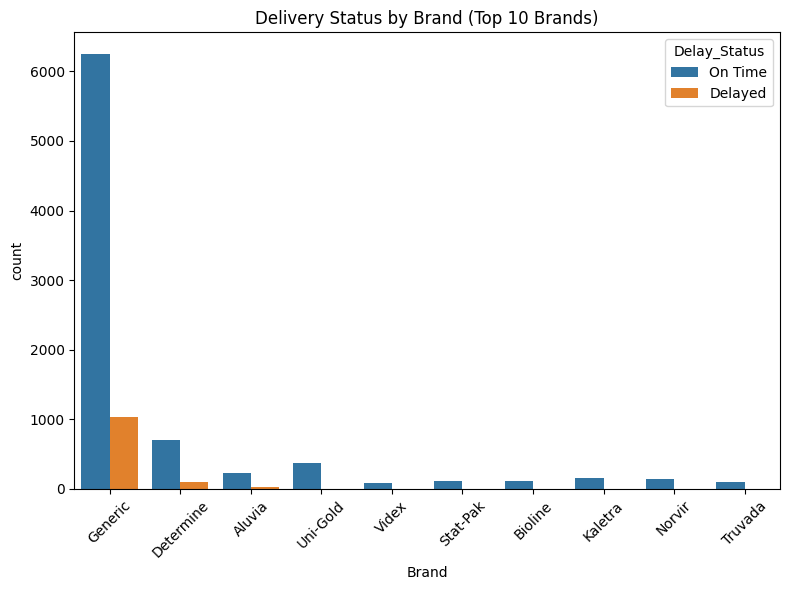

In [ ]:
top_brands = df['Brand'].value_counts().head(10).index
filtered_df = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(8, 6)) # Set the figure size
sns.countplot(data=filtered_df, x='Brand', hue='Delay_Status')
plt.title('Delivery Status by Brand (Top 10 Brands)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows the top 10 brands and how often their deliveries were on time or delayed. The Generic brand has the highest number of deliveries overall, but it also shows a large number of delays compared to other brands. In contrast, most other brands like Determine, Aluvia, Uni-Gold, and others have fewer total deliveries and much fewer delays. This suggests that while Generic is widely used, it may need more focus to improve delivery reliability. Monitoring and improving the logistics for this brand could help reduce the overall number of delays in the supply chain.



##16.Analyse of Average freight cost for deffrent shipping modes :

<ipython-input-53-421793566>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost.index, y=avg_cost.values, palette='viridis')


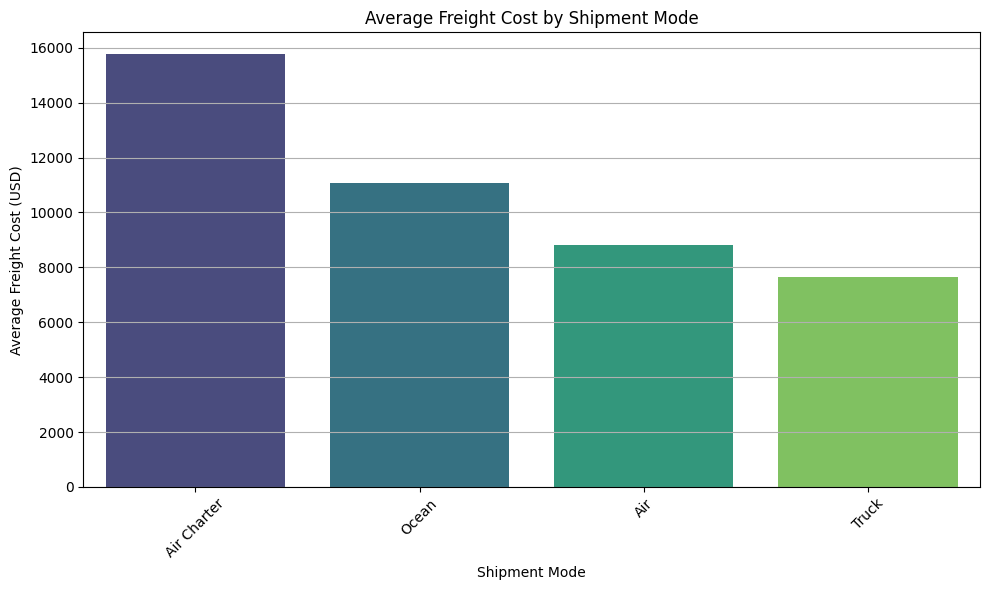

In [ ]:
# Group by shipment mode and calculate average cost
avg_cost =df.groupby('Shipment Mode')['Freight Cost (USD)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_cost.index, y=avg_cost.values, palette='viridis')
plt.title('Average Freight Cost by Shipment Mode')
plt.ylabel('Average Freight Cost (USD)')
plt.xlabel('Shipment Mode')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The Charts Showes the Average freight cost for deffrent shipping modes in USD. Air charter is the most expensive, costing around 15,000. Ocean shipping costs around 11,000, While Air shipping is around 9,000. Trucks shipping is the cheapest at roughly 7,000. This means he priciest option, and Truck is the most-budget friendly for shipping goods.

##17.Analyse the freight cost per kilogram by vendor :

<ipython-input-54-3811335691>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


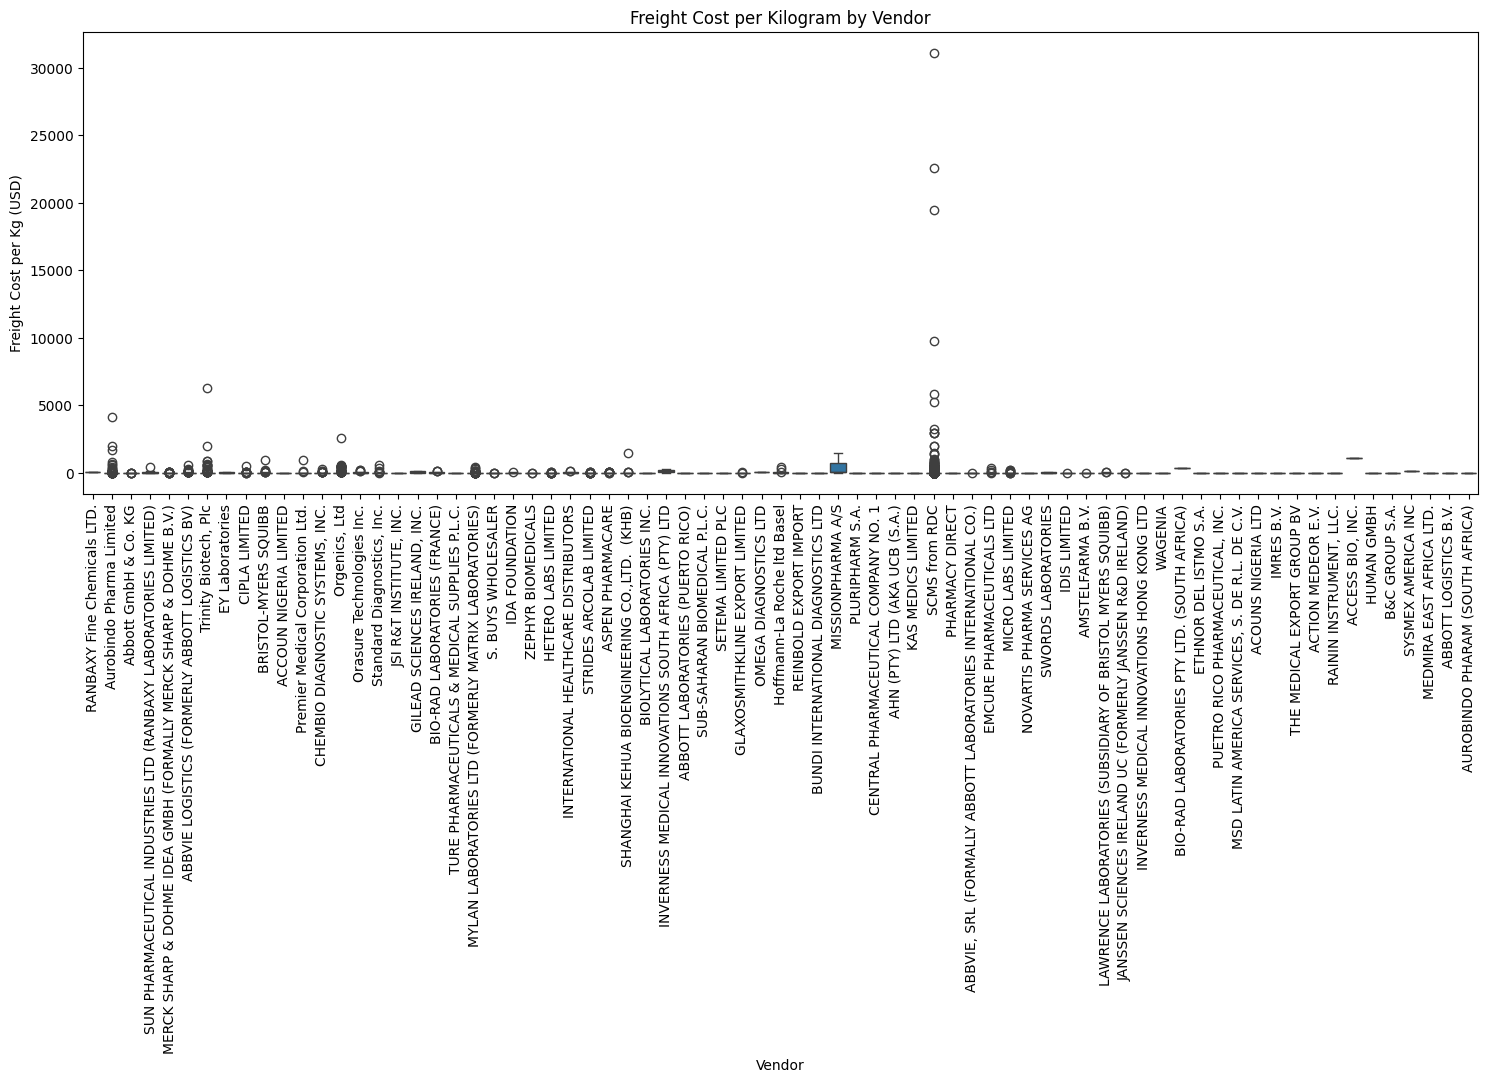

In [ ]:

# Filter and compute cost per kg
df_clean = df[
    (df["Weight (Kilograms)"] > 0) &
    (df["Freight Cost (USD)"] > 0)
].copy()

df_clean["Freight Cost per Kg"] = df_clean["Freight Cost (USD)"] / df_clean["Weight (Kilograms)"]

# Plot
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_clean, x="Vendor", y="Freight Cost per Kg")
plt.xticks(rotation=90)
plt.title("Freight Cost per Kilogram by Vendor")
plt.xlabel("Vendor")
plt.ylabel("Freight Cost per Kg (USD)")
plt.tight_layout()
plt.show()

This chart shows the freight cost per kilogram for different vendors. Most vendors have costs that stay in a similar range, but a few vendors have very high freight costs, shown by the outliers (points that are far above the others). The chart helps us see which vendors have higher or lower freight costs compared to others. It looks like one or two vendors stand out with extremely high costs, which may need further investigation.

##18.Analyse of the freight cost per kilogram by shipment mode

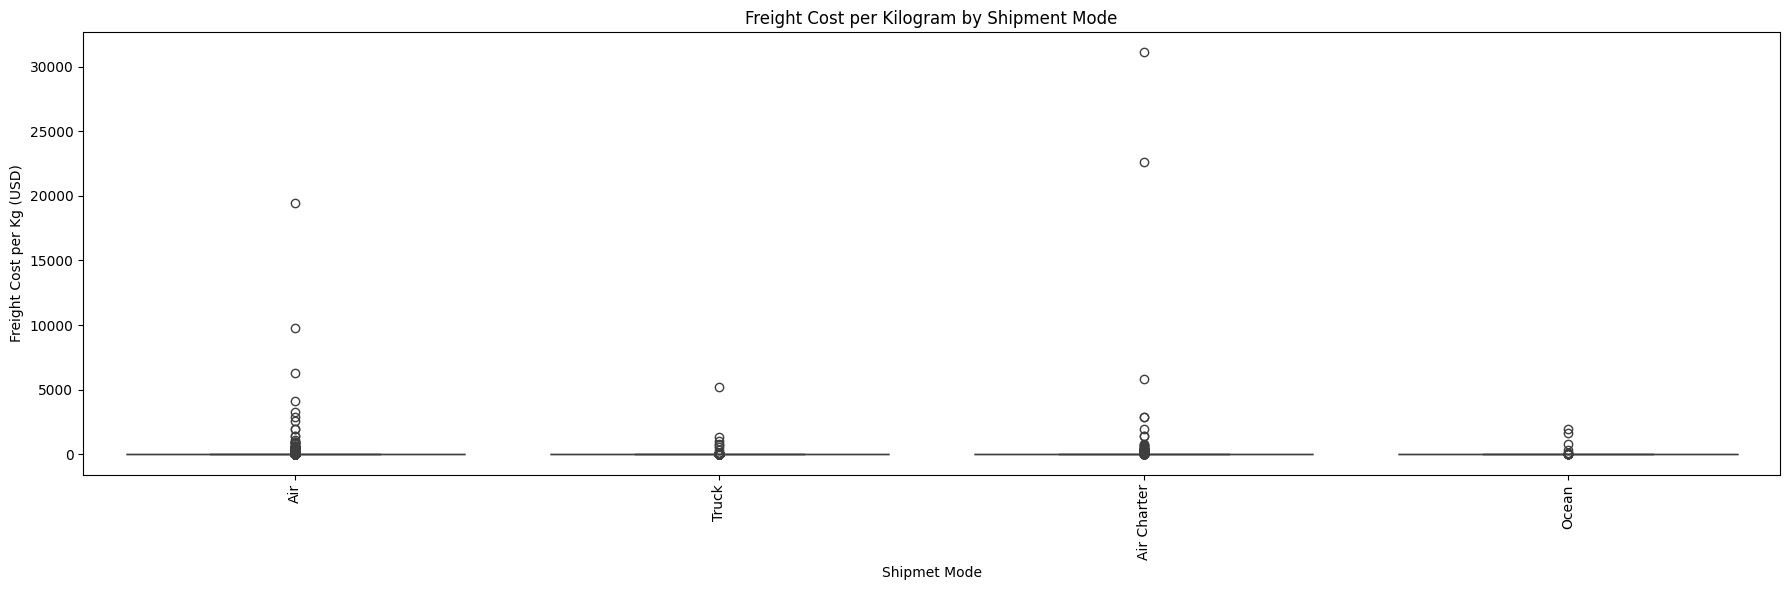

In [ ]:

# Filter and compute cost per kg
df_clean = df[
    (df["Weight (Kilograms)"] > 0) &
    (df["Freight Cost (USD)"] > 0)
].copy()

df_clean["Freight Cost per Kg"] = df_clean["Freight Cost (USD)"] / df_clean["Weight (Kilograms)"]

# Plot
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_clean, x="Shipment Mode", y="Freight Cost per Kg")
plt.xticks(rotation=90)
plt.title("Freight Cost per Kilogram by Shipment Mode")
plt.xlabel("Shipmet Mode")
plt.ylabel("Freight Cost per Kg (USD)")
plt.tight_layout()
plt.show()

This code calculates the freight cost per kilogram by dividing the total freight cost by the shipment weight for each record. It then creates a boxplot to compare this cost across different shipment modes (like air, sea, etc.). The chart helps to see which shipment modes are more expensive or have high variation in cost. For this project, this is useful to analyze and compare shipment methods and decide which mode is cost-effective and stable for future deliveries.

##19.Analyse of the total freight cost by product group :

<ipython-input-56-4292928123>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_freight, x='Product Group', y='Freight Cost (USD)', palette='viridis')


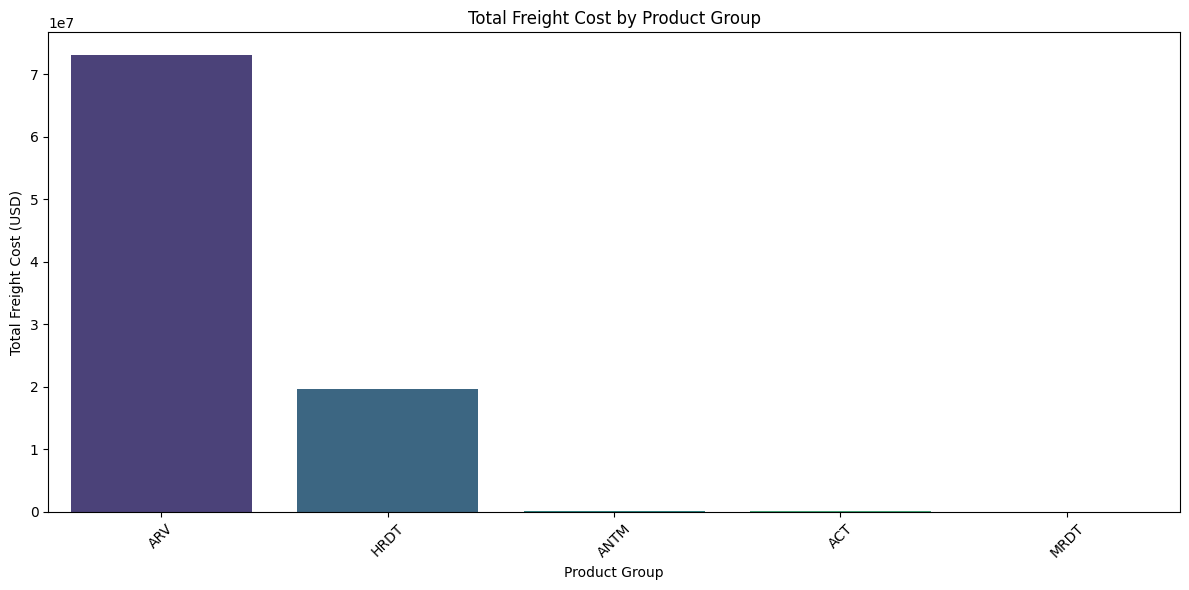

In [ ]:
# Group by 'Product Group' and sum the 'Freight Cost (USD)'
product_freight = df.groupby('Product Group')['Freight Cost (USD)'].sum().sort_values(ascending=False)

# Reset index for plotting
product_freight = product_freight.reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=product_freight, x='Product Group', y='Freight Cost (USD)', palette='viridis')

# Add labels and rotate x-axis labels for readability
plt.title('Total Freight Cost by Product Group')
plt.xlabel('Product Group')
plt.ylabel('Total Freight Cost (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows the total freight cost by product group, with ARV having the highest cost by far—over $70 million—followed by HRDT at around $20 million, while the other groups (ANTM, ACT, MRDT) have much lower costs. This suggests that ARV shipments are either more frequent, heavier, or more expensive to transport. For further analysis, we can look into why ARV costs are so high and explore ways to reduce freight expenses, such as optimizing shipping methods, reviewing routes, or comparing costs with the value of goods shipped.

##20.Analyse of the freight cost distribution by delivery status :

<ipython-input-57-954175850>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Delay_Status', y='Freight Cost (USD)', palette='Set2')


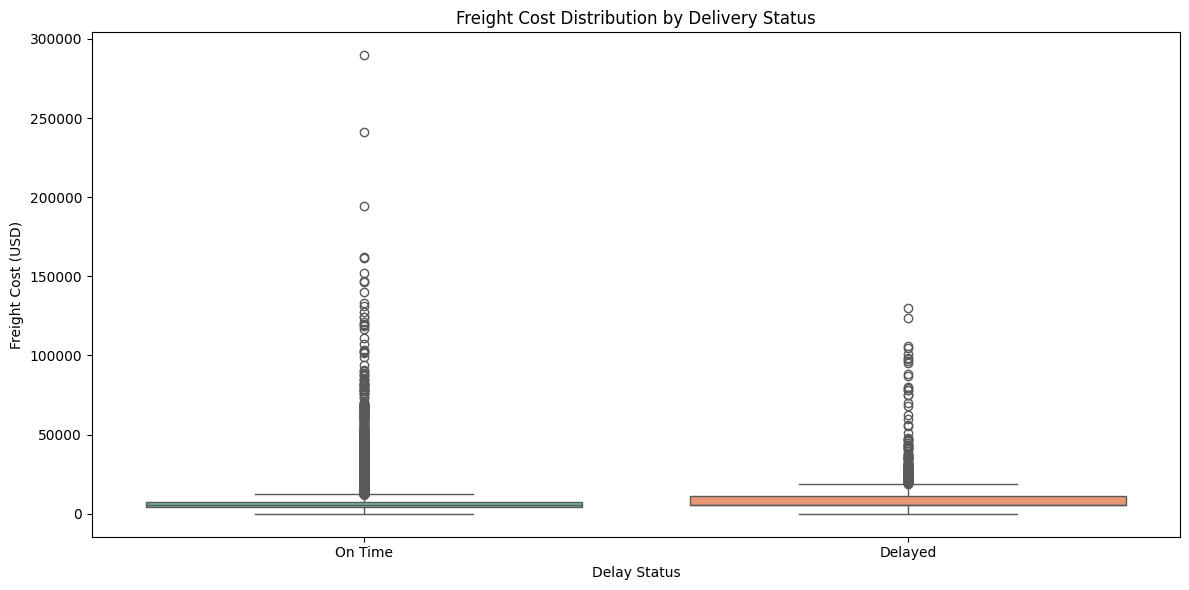

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Delay_Status', y='Freight Cost (USD)', palette='Set2')
plt.title('Freight Cost Distribution by Delivery Status')
plt.ylabel('Freight Cost (USD)')
plt.xlabel('Delay Status')
plt.tight_layout()
plt.show()


This chart shows the freight cost distribution for deliveries that were either on time or delayed. We can see that both types have a wide range of costs, but on-time deliveries include more extreme high-cost shipments, with some going over $250,000. Delayed shipments tend to have slightly higher median costs but fewer extreme values.
We should explore why some on-time deliveries are so expensive—are these rush shipments or large orders? Also, we can investigate if delays are linked to higher costs and look for ways to reduce both delay rates and shipping expenses.

##21.Analyse of Freight Cost by product group :

<ipython-input-58-1347149158>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Product Group', y='Freight Cost (USD)', palette='coolwarm')


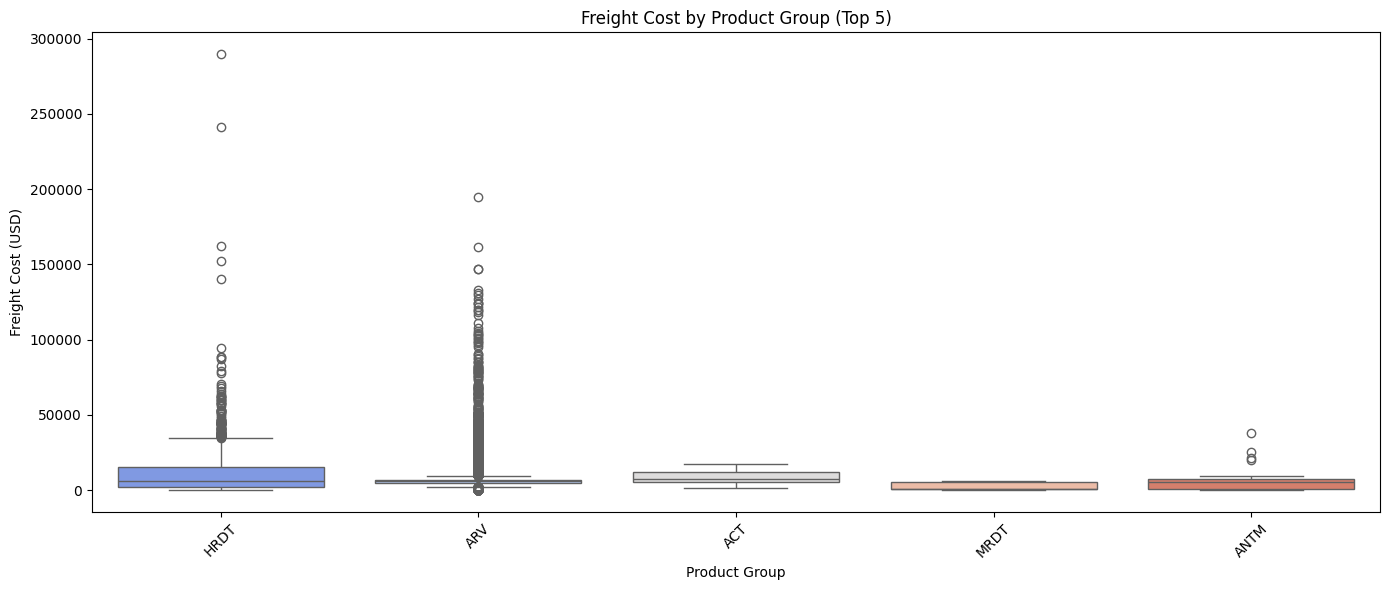

In [ ]:
top_products = df.groupby('Product Group')['Freight Cost (USD)'].sum().sort_values(ascending=False).head(10).index
filtered_df = df[df['Product Group'].isin(top_products)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_df, x='Product Group', y='Freight Cost (USD)', palette='coolwarm')
plt.title('Freight Cost by Product Group (Top 5)')
plt.ylabel('Freight Cost (USD)')
plt.xlabel('Product Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart shows the freight cost distribution for the top 5 product groups: HRDT, ARV, ACT, MRDT, and ANTM. HRDT and ARV have the highest number of costly shipments, with many outliers above $100,000, suggesting that these groups are responsible for most of the high freight expenses. In contrast, ACT, MRDT, and ANTM have lower and more consistent freight costs.

We can focus on analyzing HRDT and ARV shipments to understand the reasons behind these high costs—such as order size, shipping routes, or urgency—and find ways to optimize or reduce expenses in these product groups.

##22.Analyse of the relationship between freight cost and line item value by delay status :

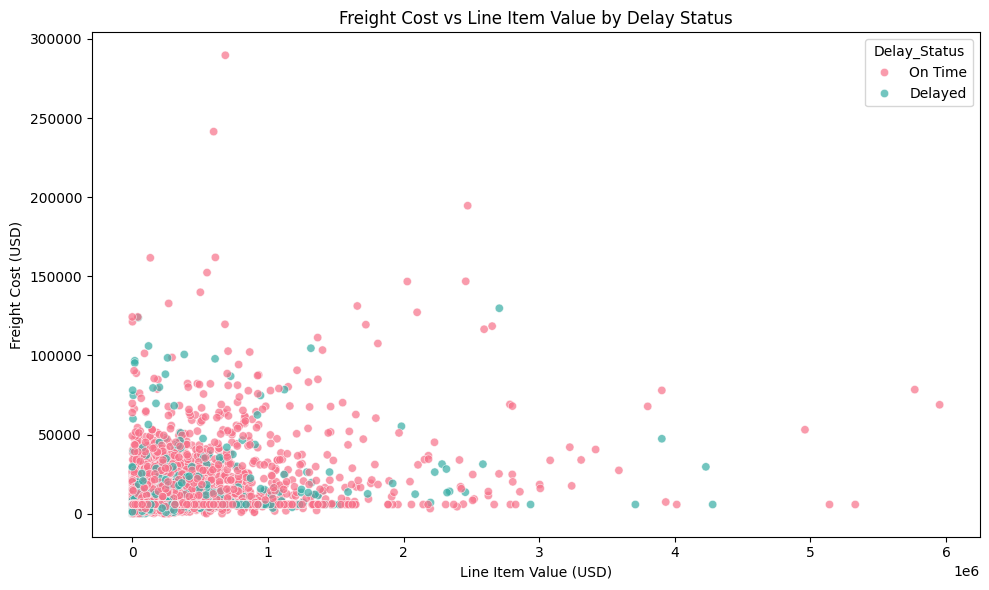

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Line Item Value',
    y='Freight Cost (USD)',
    hue='Delay_Status',
    palette='husl',
    alpha=0.7
)
plt.title('Freight Cost vs Line Item Value by Delay Status')
plt.xlabel('Line Item Value (USD)')
plt.ylabel('Freight Cost (USD)')
plt.tight_layout()
plt.show()


This scatter plot shows the relationship between freight cost and line item value, categorized by delivery status (on time vs. delayed). Most shipments, regardless of status, are clustered in the lower cost and value range. However, some on-time deliveries have very high freight costs, even for lower-value items. Both on-time and delayed deliveries appear across all value ranges, with no clear pattern suggesting delays are tied to more expensive or cheaper shipments.
We should investigate why some low-value shipments have high freight costs, especially when delivered on time. Also, analyzing whether certain products or locations contribute to these trends could help reduce unnecessary high shipping costs and improve delivery planning.

##23.Analyse of relationship between freight cost and shipment weight :

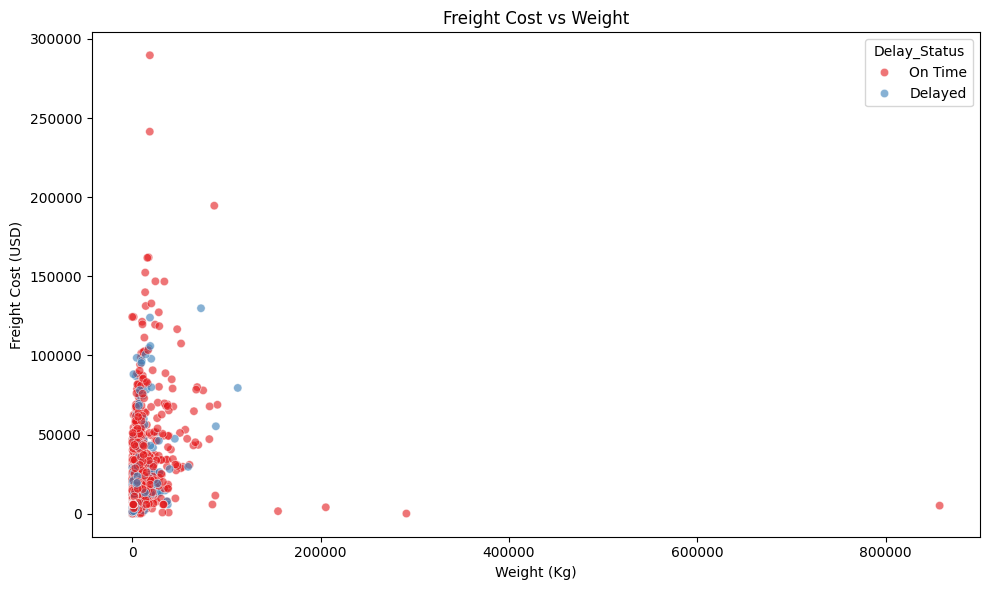

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Weight (Kilograms)',
    y='Freight Cost (USD)',
    hue='Delay_Status',
    palette='Set1',
    alpha=0.6
)
plt.title('Freight Cost vs Weight')
plt.xlabel('Weight (Kg)')
plt.ylabel('Freight Cost (USD)')
plt.tight_layout()
plt.show()


This scatter plot shows the relationship between freight cost and shipment weight, with data colored by delivery status (on time vs. delayed). Most shipments are concentrated at lower weights, and their freight costs vary widely. Interestingly, there are many high-cost shipments at low weights, especially for on-time deliveries, while very heavy shipments often have relatively low costs. Delay status doesn’t show a strong visible trend with weight or cost.
We should explore why lighter shipments sometimes cost more to transport, and check for factors like shipping mode, urgency, or location. Understanding these patterns could help reduce costs and improve logistics planning.

##24.Analyse of  relationship between product value and freight cost :

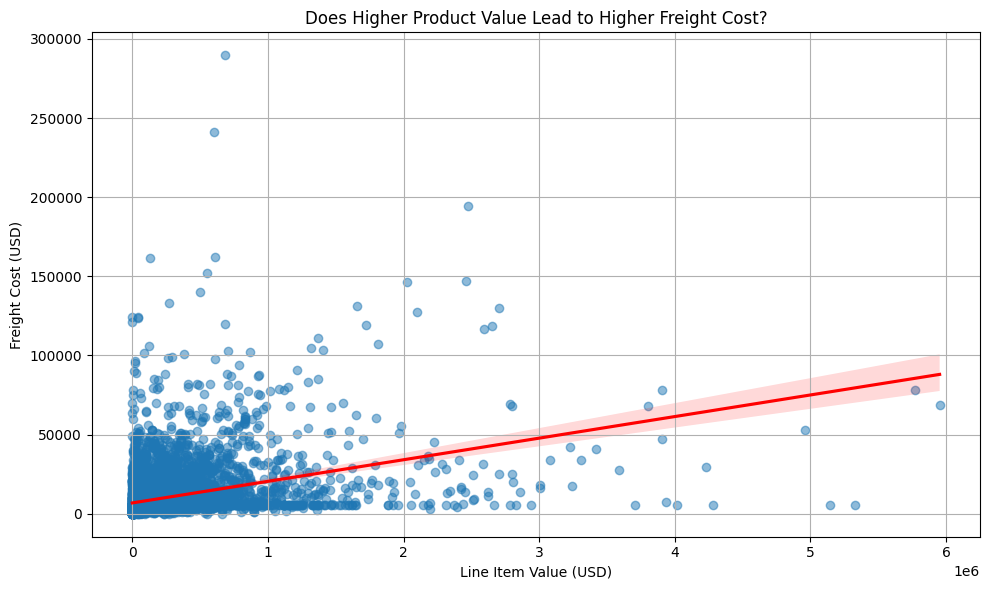

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Line Item Value',
    y='Freight Cost (USD)',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.title('Does Higher Product Value Lead to Higher Freight Cost?')
plt.xlabel('Line Item Value (USD)')
plt.ylabel('Freight Cost (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot shows a moderate positive relationship between product value and freight cost, as indicated by the upward-sloping regression line. This suggests that higher product values tend to be associated with higher freight costs. However, the relationship is not strong—there is considerable variance across all value ranges, with many low-value items incurring high freight costs and vice versa. The spread indicates that other factors, such as weight, urgency, product type, or shipping method, likely play a significant role in influencing freight costs. Overall, while product value has some effect, it is not a strong standalone predictor of freight cost.

#***Conclusion :***

In conclusion, this comprehensive analysis has yielded valuable insights into key areas of FedEx's logistics operations—specifically shipment modes, freight costs, delivery performance, and vendor management. The findings reveal strong correlations between these factors, particularly between higher freight costs, faster shipment modes, and improved on-time delivery rates, highlighting clear opportunities for operational optimization.

To meet the business goals of cost efficiency and improved delivery reliability, the company should prioritize strategic initiatives such as optimizing the use of shipment modes, strengthening vendor management, and adopting data-driven forecasting and decision-making tools. Reducing overdependence on expensive air freight, improving the scheduling of purchase orders, addressing cost anomalies, and fostering high-performing vendor relationships can collectively lead to better financial performance and enhanced customer satisfaction.

